# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

# question 1

In [2]:
from inauguralproject import InauguralprojectClass

In [3]:
model = InauguralprojectClass()

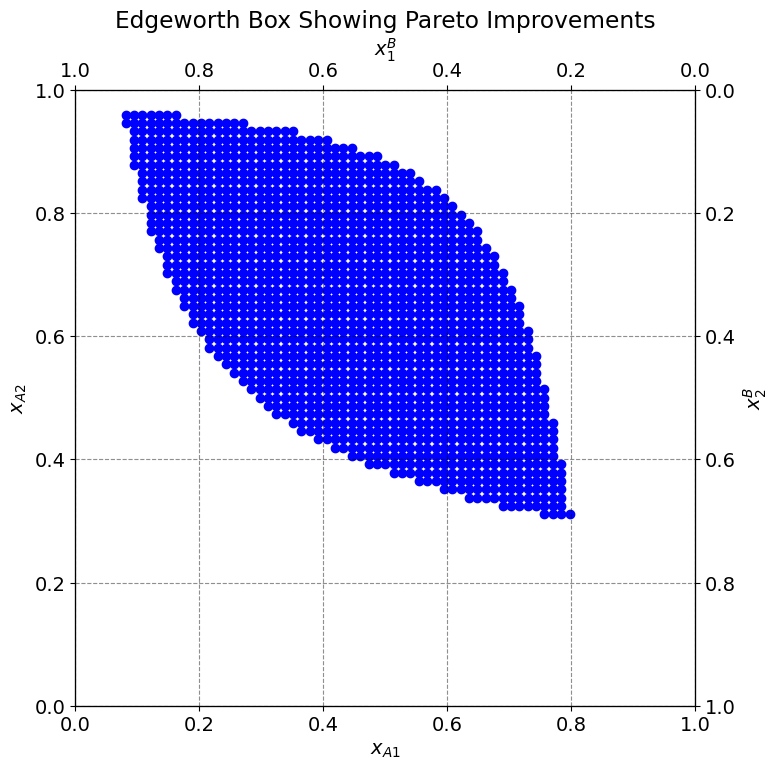

In [4]:
N = 75
x_grid = np.linspace(0, 1, N)

uA_initial = model.utility_A(model.w1A, model.w2A)
uB_initial = model.utility_B(model.w1B, model.w2B)

pareto_set = []

for xA1 in x_grid:
    for xA2 in x_grid:
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        
        
        uA_new = model.utility_A(xA1, xA2)
        uB_new = model.utility_B(xB1, xB2)
        
        
        if uA_new >= uA_initial and uB_new >= uB_initial:
            pareto_set.append((xA1, xA2))


pareto_xA1, pareto_xA2 = zip(*pareto_set) if pareto_set else ([], [])

# Plotting the Edgeworth Box with Pareto improvements
plt.figure(figsize=(8, 8))


plt.scatter(pareto_xA1, pareto_xA2, color='blue', label='Pareto Improvements for A')


plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

plt.xlim(0, 1)
plt.ylim(0, 1)


ax2 = plt.twiny()  
ax3 = plt.twinx()  

ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)


ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')


ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()

plt.title('Edgeworth Box Showing Pareto Improvements')
plt.grid(True)


plt.show()

# Question 2

In [5]:
N = 75
p1_range = np.linspace(0.5, 2.5, N + 1)

model = InauguralprojectClass()  # Initialize the model

errors_1 = []
errors_2 = []

for p1 in p1_range:
    eps1, eps2 = model.epsilons(p1)  # Assuming you want to use epsilons method from the class
    errors_1.append(eps1)
    errors_2.append(eps2)

print("Errors in market clearing conditions:")
for i, p1 in enumerate(p1_range):
    print(f"p1 = {p1:.4f}, ε1 = {errors_1[i]:.4f}, ε2 = {errors_2[i]:.4f}")

Errors in market clearing conditions:
p1 = 0.5000, ε1 = 0.5333, ε2 = -0.2667
p1 = 0.5267, ε1 = 0.4759, ε2 = -0.2507
p1 = 0.5533, ε1 = 0.4241, ε2 = -0.2347
p1 = 0.5800, ε1 = 0.3770, ε2 = -0.2187
p1 = 0.6067, ε1 = 0.3341, ε2 = -0.2027
p1 = 0.6333, ε1 = 0.2947, ε2 = -0.1867
p1 = 0.6600, ε1 = 0.2586, ε2 = -0.1707
p1 = 0.6867, ε1 = 0.2252, ε2 = -0.1547
p1 = 0.7133, ε1 = 0.1944, ε2 = -0.1387
p1 = 0.7400, ε1 = 0.1658, ε2 = -0.1227
p1 = 0.7667, ε1 = 0.1391, ε2 = -0.1067
p1 = 0.7933, ε1 = 0.1143, ε2 = -0.0907
p1 = 0.8200, ε1 = 0.0911, ε2 = -0.0747
p1 = 0.8467, ε1 = 0.0693, ε2 = -0.0587
p1 = 0.8733, ε1 = 0.0489, ε2 = -0.0427
p1 = 0.9000, ε1 = 0.0296, ε2 = -0.0267
p1 = 0.9267, ε1 = 0.0115, ε2 = -0.0107
p1 = 0.9533, ε1 = -0.0056, ε2 = 0.0053
p1 = 0.9800, ε1 = -0.0218, ε2 = 0.0213
p1 = 1.0067, ε1 = -0.0371, ε2 = 0.0373
p1 = 1.0333, ε1 = -0.0516, ε2 = 0.0533
p1 = 1.0600, ε1 = -0.0654, ε2 = 0.0693
p1 = 1.0867, ε1 = -0.0785, ε2 = 0.0853
p1 = 1.1133, ε1 = -0.0910, ε2 = 0.1013
p1 = 1.1400, ε1 = -0.1029,

# Question 3

The market clearing price is 0.953


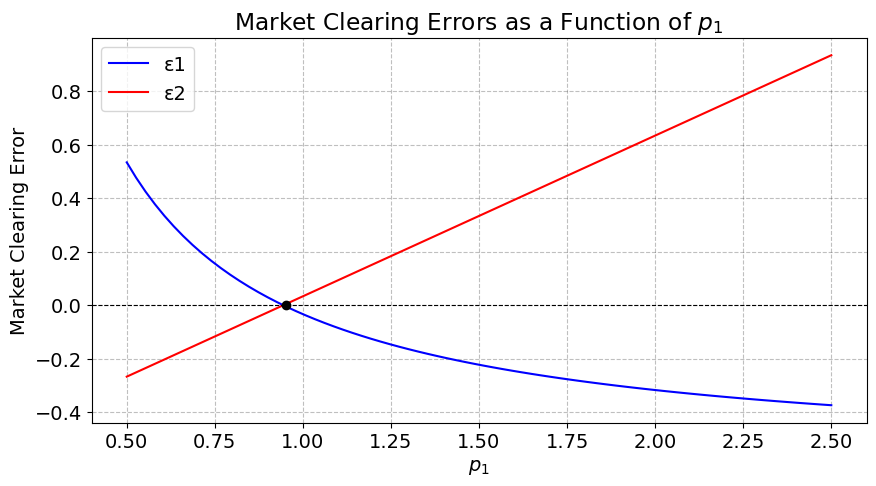

In [6]:
model = InauguralprojectClass() 

N = 75
p1_range = np.linspace(0.5, 2.5, N + 1)

errors_1 = []
errors_2 = []

# Calculate errors for each p1 in range
for p1 in p1_range:
    eps1, eps2 = model.epsilons(p1)
    errors_1.append(eps1)
    errors_2.append(eps2)

# Combine errors to find minimum absolute sum of errors
combined_errors = np.abs(np.array(errors_1)) + np.abs(np.array(errors_2))
min_abs_error_index = np.argmin(combined_errors)
market_clearing_p1 = p1_range[min_abs_error_index]

# Printing the market clearing price
print(f"The market clearing price is {market_clearing_p1:.3f}")

# Plotting the errors
plt.figure(figsize=(10, 5))
plt.plot(p1_range, errors_1, label='ε1', color='blue')
plt.plot(p1_range, errors_2, label='ε2', color='red')
plt.scatter([market_clearing_p1], [0], color='black', zorder=5)  # Mark the minimum error point
plt.title('Market Clearing Errors as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Error')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()

In [7]:
Allocation = model.demand_A(market_clearing_p1)
print(Allocation)

(0.3715617715617715, 0.7084444444444445)


Explain your code and procedure

# Question 4.a+b

Optimal price for Agent A is 1.887, maximizing their utility at 0.634.
Optimal allocation for Agent A is x1A = 0.619, x2A = 0.641.
Optimal price for Agent B is 0.527, maximizing their utility at 0.645.
Optimal allocation for Agent B is x1B = 0.543, x2B = 0.519.


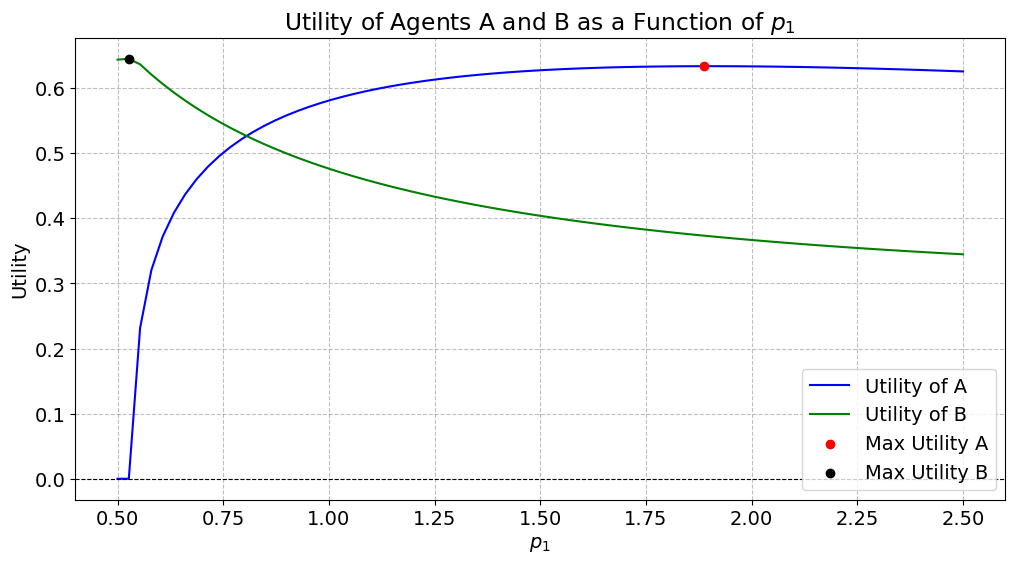

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Initialize the model
model = InauguralprojectClass()

# Define parameters for the price range
N = 75
p1_range = np.linspace(0.5, 2.5, N + 1)
a_utility = []
b_utility = []

# Calculate utilities and demands for each p1, for both agents A and B
for p1 in p1_range:
    # Agent B's demands determine what is left for Agent A
    x1B, x2B = model.demand_B(p1)
    x1B = np.clip(x1B, 0, 1)
    x2B = np.clip(x2B, 0, 1)

    # Agent A's utility is calculated based on what B does not consume
    x1A = 1 - x1B
    x2A = 1 - x2B
    a_utility.append(model.utility_A(x1A, x2A))
    b_utility.append(model.utility_B(x1B, x2B))

# Finding the optimal prices and utilities
max_utility_index_A = np.argmax(a_utility)
optimal_price_A = p1_range[max_utility_index_A]
max_utility_A = a_utility[max_utility_index_A]
optimal_allocation_A = (1 - np.clip(model.demand_B(optimal_price_A)[0], 0, 1), 
                        1 - np.clip(model.demand_B(optimal_price_A)[1], 0, 1))

max_utility_index_B = np.argmax(b_utility)
optimal_price_B = p1_range[max_utility_index_B]
max_utility_B = b_utility[max_utility_index_B]
optimal_allocation_B = (1 - np.clip(model.demand_A(optimal_price_B)[0], 0, 1), 
                        1 - np.clip(model.demand_A(optimal_price_B)[1], 0, 1))

# Print results for both agents
print(f"Optimal price for Agent A is {optimal_price_A:.3f}, maximizing their utility at {max_utility_A:.3f}.")
print(f"Optimal allocation for Agent A is x1A = {optimal_allocation_A[0]:.3f}, x2A = {optimal_allocation_A[1]:.3f}.")
print(f"Optimal price for Agent B is {optimal_price_B:.3f}, maximizing their utility at {max_utility_B:.3f}.")
print(f"Optimal allocation for Agent B is x1B = {optimal_allocation_B[0]:.3f}, x2B = {optimal_allocation_B[1]:.3f}.")

# Plotting the utilities as functions of price p1
plt.figure(figsize=(12, 6))
plt.plot(p1_range, a_utility, label='Utility of A', color='blue')
plt.plot(p1_range, b_utility, label='Utility of B', color='green')
plt.scatter([optimal_price_A], [max_utility_A], color='red', zorder=5, label='Max Utility A')  # Highlight the optimal price for A
plt.scatter([optimal_price_B], [max_utility_B], color='black', zorder=5, label='Max Utility B')  # Highlight the optimal price for B
plt.title('Utility of Agents A and B as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Utility')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()


If any postive price can be used, it can be seen, that our optimal p will go towards infinity, if a boundarie is not set. 

# Question 5.a

In [9]:
import numpy as np


model = InauguralprojectClass()

x1A_range = np.linspace(0, 1, 1000)
x2A_range = np.linspace(0, 1, 1000)

max_utility_A = 0
optimal_x1A = None
optimal_x2A = None

def pareto_C(x1A, x2A):
    return model.utility_A(x1A, x2A) >= model.utility_A(model.w1A, model.w2A) and \
        model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(1 - model.w1A, 1 - model.w2A)

for x1A in x1A_range:
    for x2A in x2A_range:
        if pareto_C(x1A, x2A):
            utility_A_value = model.utility_A(x1A, x2A)
            if utility_A_value > max_utility_A:
                max_utility_A = utility_A_value
                optimal_x1A = x1A
                optimal_x2A = x2A

print(f"The allocation with the highest utility for A in set C is ({optimal_x1A:.3f}, {optimal_x2A:.3f})")
print(f"where the utility for A is {max_utility_A:.3f}")



The allocation with the highest utility for A in set C is (0.570, 0.849)
where the utility for A is 0.743


# Question 5.b

In [10]:
from scipy.optimize import minimize
import numpy as np

initial_utility_B = model.utility_B(model.w1B, model.w2B)

constraints = [
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - initial_utility_B}
]

bounds = [(0, 1), (0, 1)]


x0 = [model.w1A, model.w2A]

# Solve the optimization problem for 5b
result = minimize(model.max_u_a, x0, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility = -result.fun  
else:
    optimal_x1A, optimal_x2A, optimal_utility = None, None, None

(optimal_x1A, optimal_x2A), optimal_utility


((0.5757450601538892, 0.8444377859258702), 0.7432276287154398)

Here we see that, by changing the restrictions, the allocation will still be the same. This is because, the constraints are mainly the identical.

# Question 6.a

In [11]:
from scipy.optimize import minimize
import numpy as np

# Bounds to ensure x1A and x2A are within [0, 1]
bounds_for_6a = [(0, 1), (0, 1)]

x0_for_6a = [0.5, 0.5]

# Solve the optimization problem for 
result_6a = minimize(model.max_u_ab, x0_for_6a, method='SLSQP', bounds=bounds)

if result_6a.success:
    optimal_x1A_6a, optimal_x2A_6a = result_6a.x
    optimal_utility_6a = -(result_6a.fun) 
else:
    optimal_x1A_6a, optimal_x2A_6a, optimal_utility_6a = None, None, None

(optimal_x1A_6a, optimal_x2A_6a), optimal_utility_6a


((0.33341166147388446, 0.6665883190561481), 1.0582673533675457)

The allocation is, (x1a,x2a)=(0.3334,0.66659) Ua+Ub=1.058

# Question 6.b

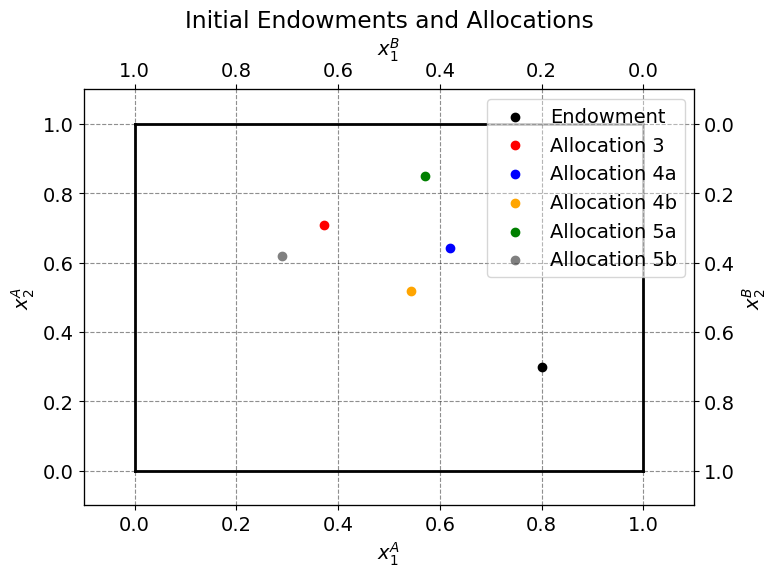

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the InauguralprojectClass is defined elsewhere
model = InauguralprojectClass()

# Initialize the plot with consistent styling
w1bar, w2bar = 1, 1

fig, ax_A = plt.subplots(figsize=(8, 6))

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

# Creating a twin axis for x2B on the right
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")

# Creating a twin axis for x1B on the top
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")

# Inverting x and y axes for the B plot to have a mirrored effect
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting example allocations
ax_A.scatter(model.w1A, model.w2A, marker='o', color='black', label='Endowment')
ax_A.scatter(0.372, 0.708, marker='o', color='red', label='Allocation 3')
ax_A.scatter(0.619, 0.641, marker='o', color='blue', label='Allocation 4a')
ax_A.scatter(0.543, 0.519, marker='o', color='orange', label='Allocation 4b')
ax_A.scatter(0.570, 0.849, marker='o', color='green', label='Allocation 5a')
ax_A.scatter(0.289, 0.620, marker='o', color='gray', label='Allocation 5b')

# Defining plot boundaries
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Setting plot limits
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Positioning the legend outside the plot area for clarity
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1, 1))
ax_A.set_title('Initial Endowments and Allocations')

plt.tight_layout()
plt.show()




# Question 7

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

W = np.random.uniform(low=0, high=1, size=(50, 2))

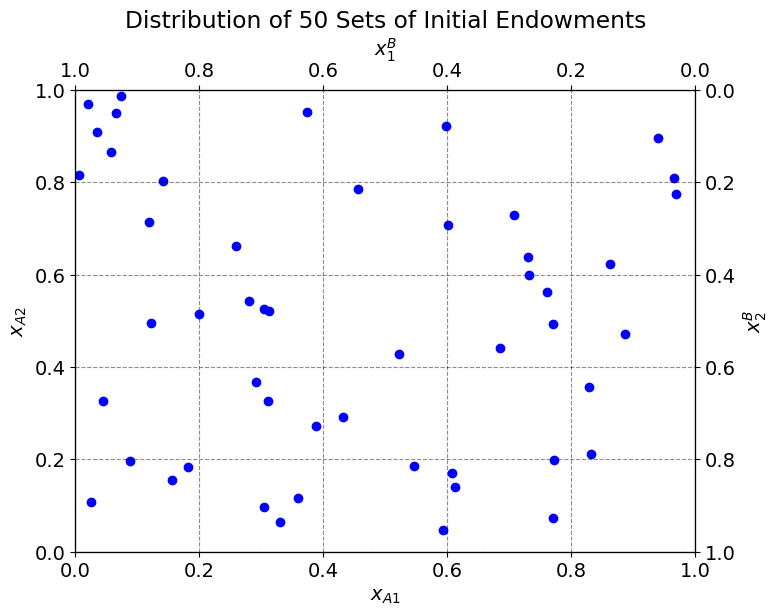

In [14]:
#plotting
plt.figure(figsize=(8, 6))
plt.scatter(W[:, 0], W[:, 1], color='blue', marker='o', label='Initial Endowments $(\omega_{1A}, \omega_{2A})$')
plt.title('Distribution of 50 Sets of Initial Endowments')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

plt.xlim(0, 1)
plt.ylim(0, 1)


ax2 = plt.twiny()  
ax3 = plt.twinx()  


ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')


ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()


plt.grid(True)


plt.show()

# Question 8

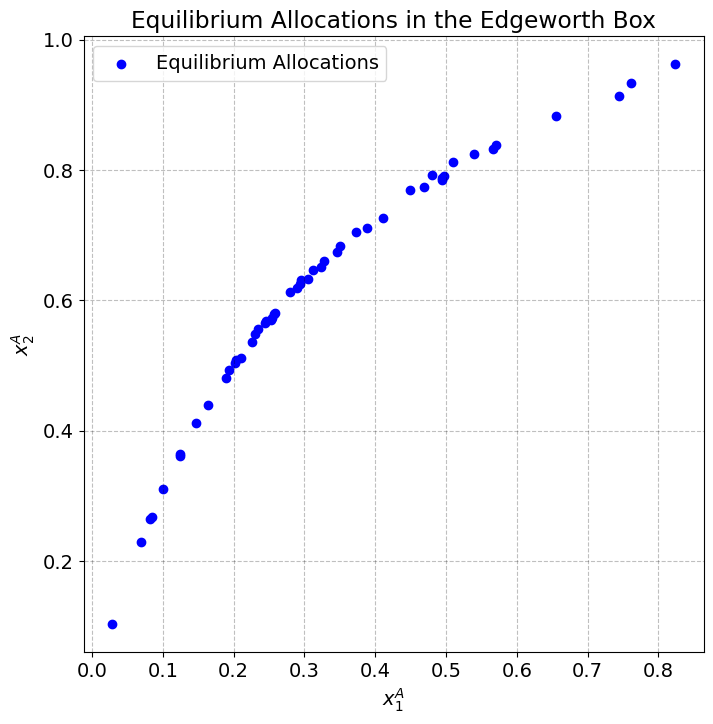

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# Define W with 50 random pairs (omega_A1, omega_A2)
np.random.seed(42)
W = np.random.uniform(low=0, high=1, size=(50, 2))

# Initialize model and simulate market equilibria
model = InauguralprojectClass()
equilibrium_allocations = [model.find_equilibrium(w[0], w[1]) for w in W]
x1A_vals = [alloc[0] for alloc in equilibrium_allocations]
x2A_vals = [alloc[1] for alloc in equilibrium_allocations]

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(x1A_vals, x2A_vals, c='blue', label='Equilibrium Allocations')
plt.title('Equilibrium Allocations in the Edgeworth Box')
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.grid(True)
plt.legend()
plt.show()
